In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0161_30.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0174_19.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0082_30.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0193_20.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0115_14.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0029_28.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0117_16.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0202_22.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0033_13.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0048_30.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0154_27.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0050_23.png
/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0201_27.png
/kaggle/input/covid19/curated_data/1No

In [2]:
# data imaging: complex : 
# processing, augmentation : resize (100,100),(224,224) ---> image , matrix , filter (3,3)
# fliping H/V , sharping , blurring --> 100*3 = 300
# splitting : train, val, test (.8,.1,.1) (.7,.15,.15)

In [2]:
import tensorflow as tf
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-04-14 19:05:51.350423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 19:05:51.350532: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 19:05:51.520163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


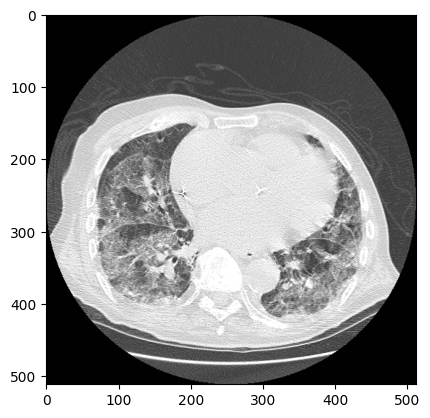

In [13]:
img= image.load_img('/kaggle/input/covid19/curated_data/2COVID/13_Bjorke_1.png')
plt.imshow(img)

In [4]:
# create a function to read all extentions : jpg, jpeg, png ...
img_types=['*.png','*.jpg','*.jpeg']
images=[]
for i in img_types:
    images.extend(glob.glob(f'/kaggle/input/covid19/curated_data/2COVID/{i}'))
new_folder='./processing_data/covid'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)
for i in images:
    img=Image.open(i).resize((224,224))
    img.save(f'{new_folder}/{os.path.split(i)[1]}')
# resizing : Input(img[0],img[1],3) --> model --> output (number classes = 2 (covid,noncovid))

In [5]:
!pip install split-folders

In [6]:
import splitfolders
input_folder='/kaggle/working/processing_data/'

In [7]:
splitfolders.ratio(input_folder,output='final_data',ratio=(.8,.1,.1))
# 70% , 10%, 20%

Copying files: 14486 files [00:02, 5412.28 files/s]


In [8]:
im_shape=(224,224)
train_dir='/kaggle/working/final_data/train'
val_dir='/kaggle/working/final_data/val'
test_dir='/kaggle/working/final_data/test'
batch_size=128 # 128, ...
num_classes=2  # covid , non_covid
learning_rate=0.0001 # 0.001

In [9]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [12]:
# data augmentation 

In [10]:
train_generator=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_generator.flow_from_directory(train_dir,target_size=(im_shape[0],im_shape[1]),shuffle=True,class_mode='binary',batch_size=batch_size)
nb_train_samples=train_generator.samples

Found 11588 images belonging to 2 classes.


In [11]:
test_generator=ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(im_shape[0],im_shape[1]),shuffle=True,class_mode='binary',batch_size=batch_size)
nb_test_samples=test_generator.samples

Found 1450 images belonging to 2 classes.


In [12]:
val_generator=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=val_generator.flow_from_directory(val_dir,target_size=(im_shape[0],im_shape[1]),shuffle=True,class_mode='binary',batch_size=batch_size)
nb_val_samples=val_generator.samples

Found 1448 images belonging to 2 classes.


In [35]:
# validation : the truth of the work 
# testing : to evaluate the work
# class 1 : 20000 images , 18000images

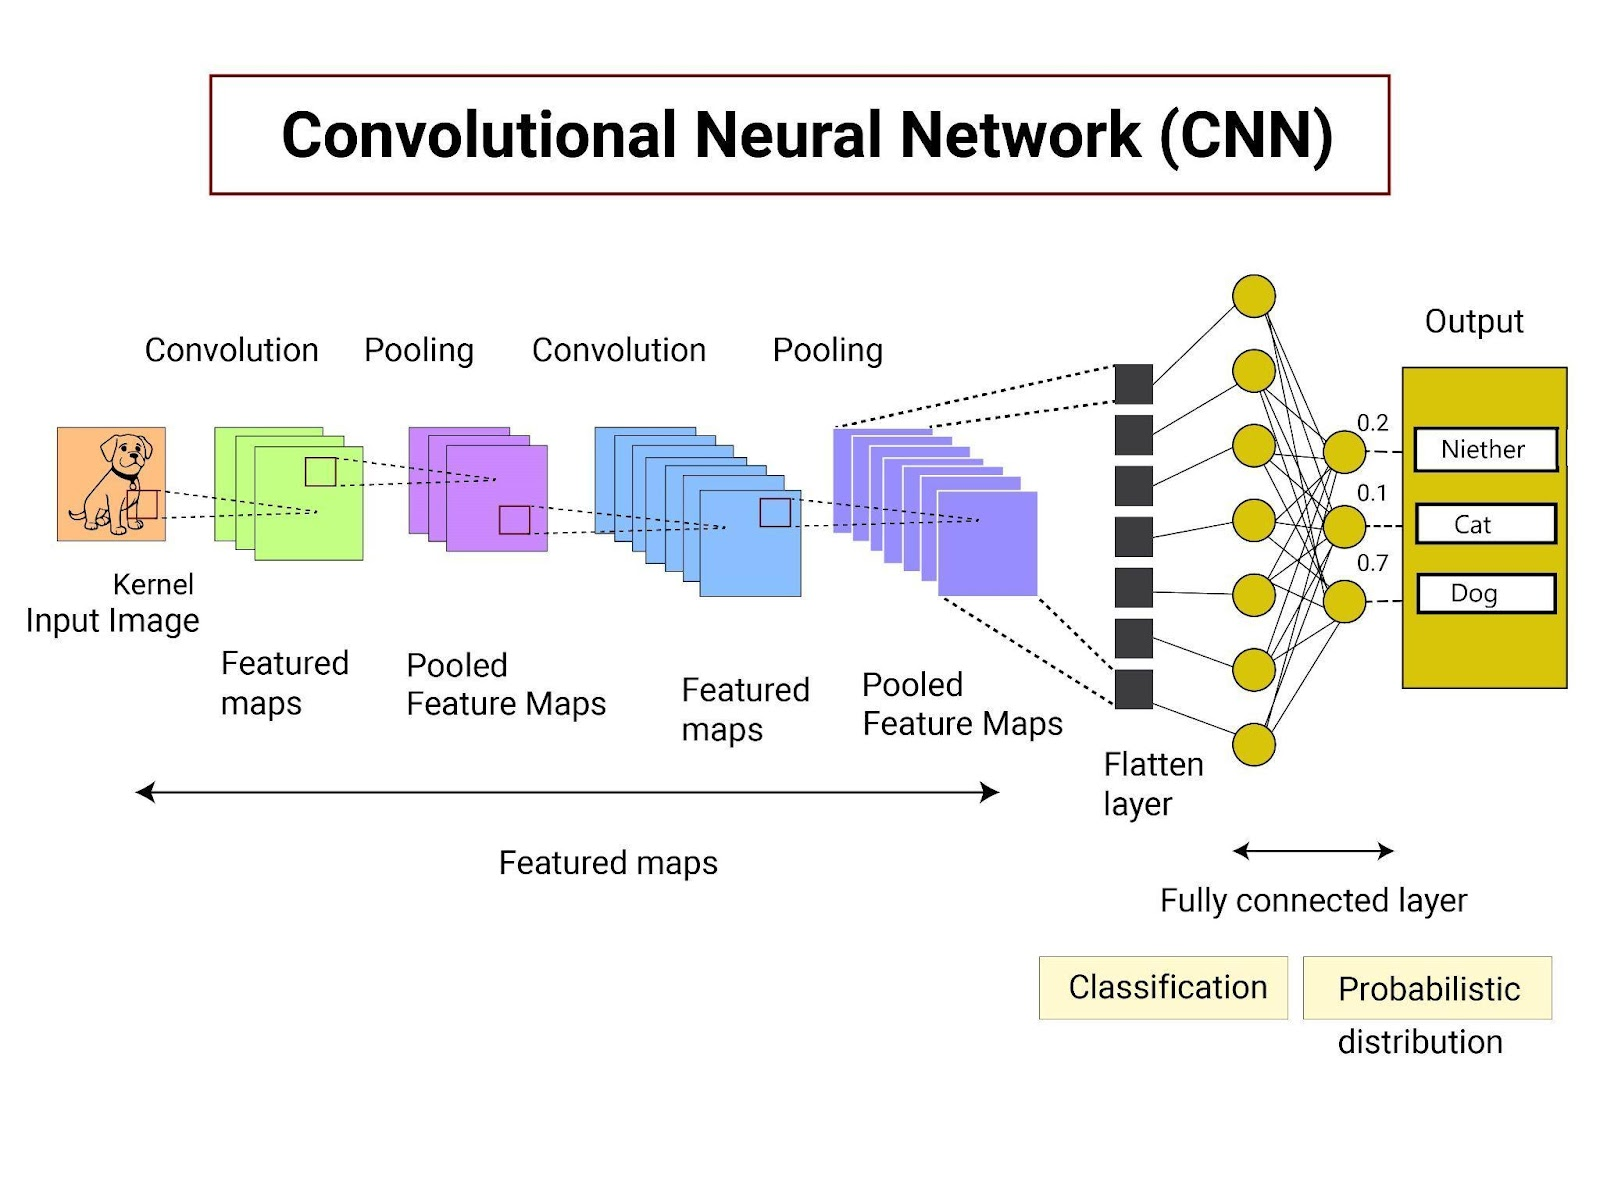

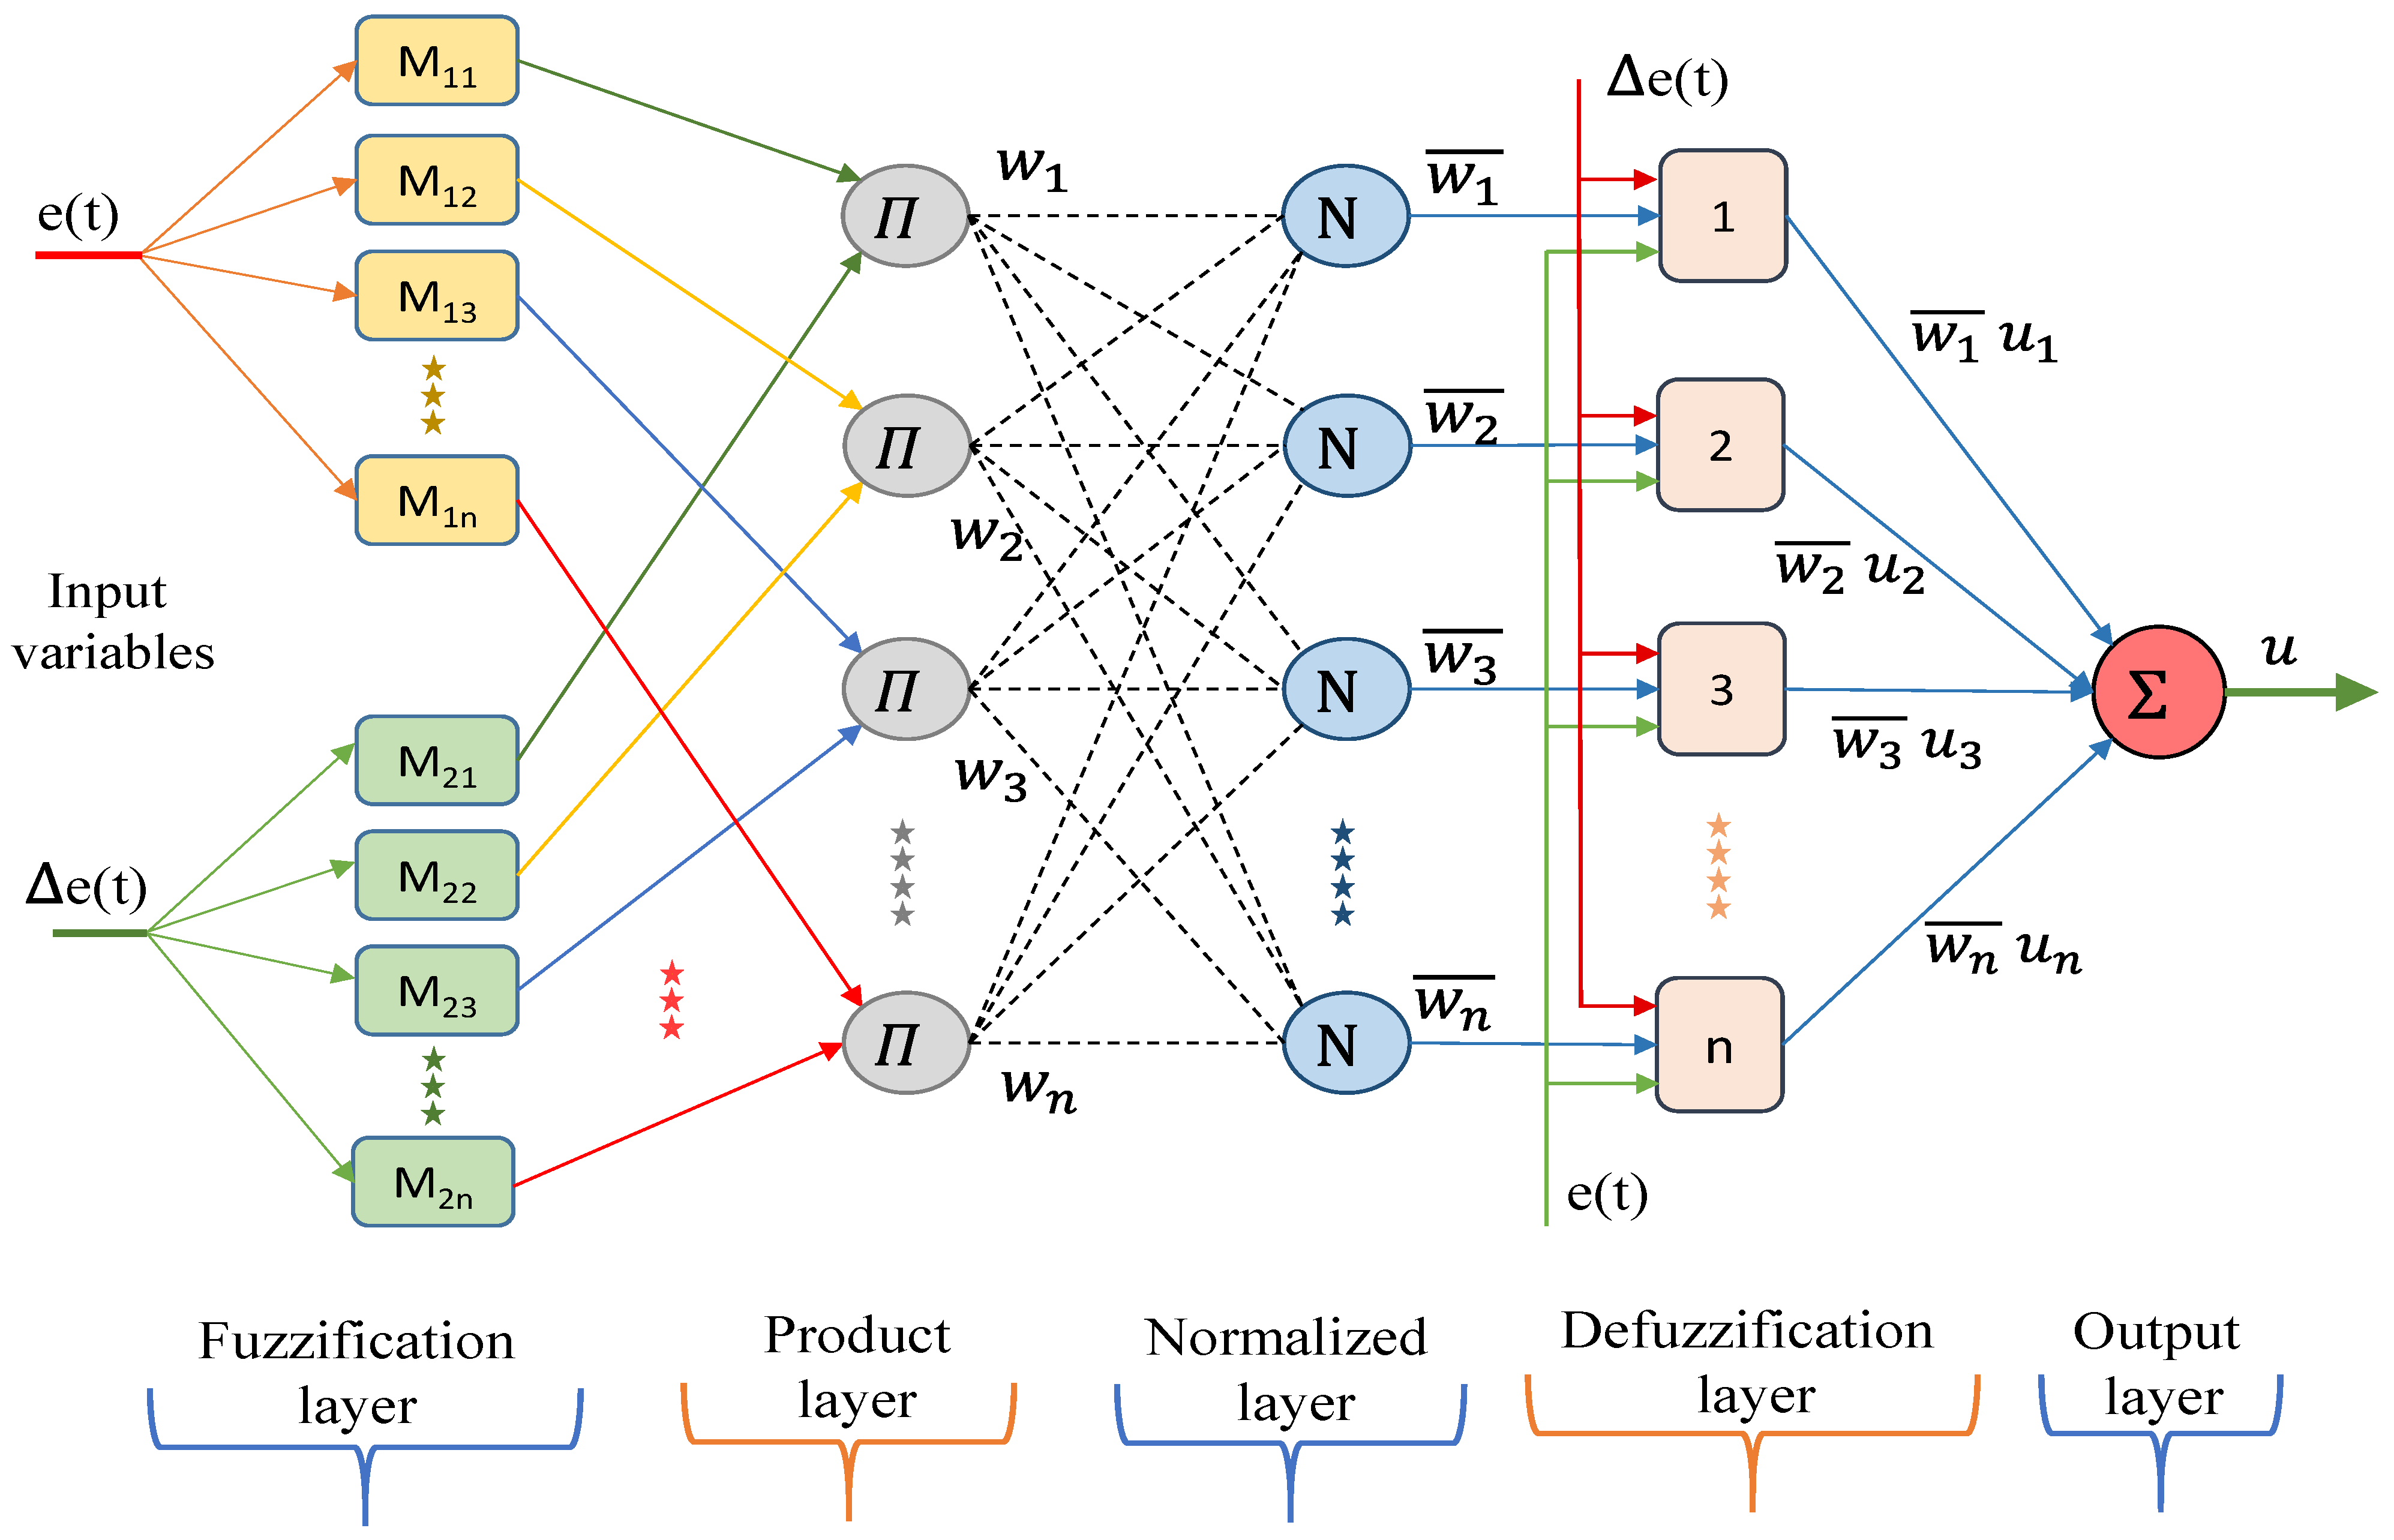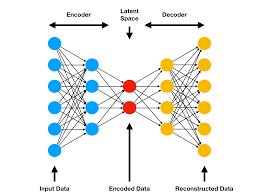

In [39]:
input_shape=(im_shape[0],im_shape[1],3)
def model1(input_shape, output):
    model=Sequential()
    model.add(Conv2D(32,(5,5),padding="same",activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(64,(5,5),padding="same",activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.13))
    model.add(Conv2D(64,(4,4),padding="same",activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.19))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(output,activation='sigmoid'))
    return model
model=model1(input_shape, 1)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │     6,272,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,429,225 (24.53 MB)

 Trainable params: 6,429,225 (24.53 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history=model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10


W0000 00:00:1713124184.825592     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


89/91 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step - accuracy: 0.7145 - loss: 0.7935

W0000 00:00:1713124232.846058     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.7161 - loss: 0.7874

W0000 00:00:1713124234.866709     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 95s 639ms/step - accuracy: 0.7169 - loss: 0.7844 - val_accuracy: 0.8557 - val_loss: 0.3642
Epoch 2/10


W0000 00:00:1713124242.565082     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 338ms/step - accuracy: 0.8476 - loss: 0.3559 - val_accuracy: 0.8757 - val_loss: 0.3168
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.8646 - loss: 0.3195 - val_accuracy: 0.8653 - val_loss: 0.3348
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - accuracy: 0.8875 - loss: 0.2831 - val_accuracy: 0.8902 - val_loss: 0.2767
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9046 - loss: 0.2379 - val_accuracy: 0.9109 - val_loss: 0.2160
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 341ms/step - accuracy: 0.9267 - loss: 0.1861 - val_accuracy: 0.9240 - val_loss: 0.1960
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.9370 - loss: 0.1602 - val_accuracy: 0.9448 - val_loss: 0.1351
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 335ms/step - accuracy: 0.9546 - loss: 0.1164 - val_accuracy: 0.9461 - val_loss: 0.1389
Epoch 9/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9643 - loss: 0.0926 - val_accuracy: 0.957

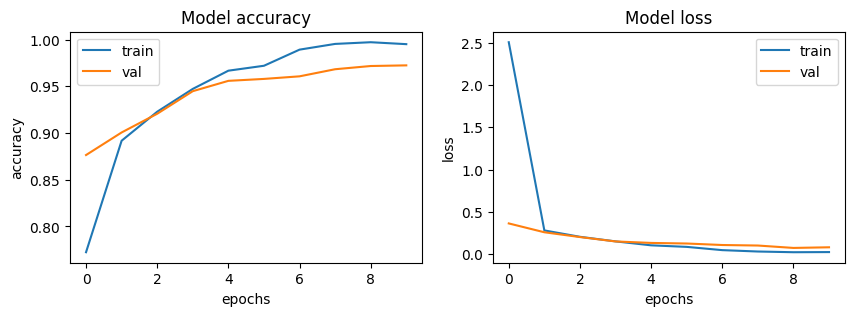

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history1.history[met])
    ax[i].plot(history1.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history1.history[met])
    ax[i].plot(history1.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [23]:
history2=model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10


W0000 00:00:1713122788.655869     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


78/91 ━━━━━━━━━━━━━━━━━━━━ 7s 557ms/step - accuracy: 0.6633 - loss: 2.0070

W0000 00:00:1713122831.627189     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.6786 - loss: 1.8355

W0000 00:00:1713122835.990875     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 88s 606ms/step - accuracy: 0.6797 - loss: 1.8239 - val_accuracy: 0.8177 - val_loss: 0.4054
Epoch 2/10


W0000 00:00:1713122843.385236     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 351ms/step - accuracy: 0.8564 - loss: 0.3303 - val_accuracy: 0.8798 - val_loss: 0.2985
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.9019 - loss: 0.2469 - val_accuracy: 0.9061 - val_loss: 0.2288
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 338ms/step - accuracy: 0.9263 - loss: 0.1980 - val_accuracy: 0.9296 - val_loss: 0.1741
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9424 - loss: 0.1493 - val_accuracy: 0.9586 - val_loss: 0.1332
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.9575 - loss: 0.1133 - val_accuracy: 0.9606 - val_loss: 0.1204
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 338ms/step - accuracy: 0.9772 - loss: 0.0681 - val_accuracy: 0.9682 - val_loss: 0.1133
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.9861 - loss: 0.0382 - val_accuracy: 0.9772 - val_loss: 0.0900
Epoch 9/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 341ms/step - accuracy: 0.9905 - loss: 0.0272 - val_accuracy: 0.977

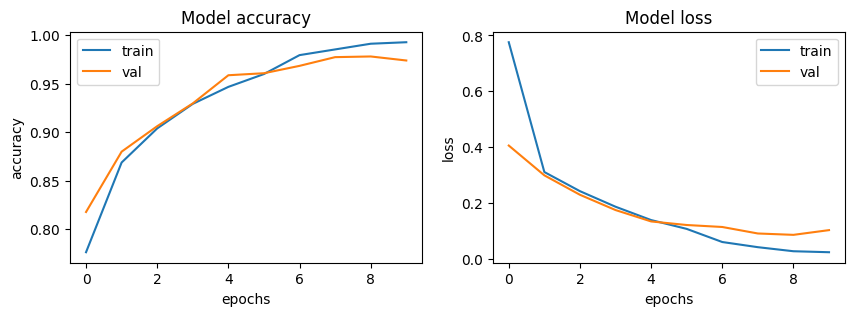

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history2.history[met])
    ax[i].plot(history2.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [25]:
scores=model.evaluate(test_generator)
print('test_evaluation Accuracy : ', scores[1]*100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 717ms/step - accuracy: 0.9771 - loss: 0.0570
test_evaluation Accuracy :  97.8620707988739


In [42]:
scores=model.evaluate(test_generator)
print('test_evaluation Accuracy : ', scores[1]*100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 781ms/step - accuracy: 0.9716 - loss: 0.0861
test_evaluation Accuracy :  96.89655303955078


W0000 00:00:1713124591.651554     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [27]:
history3=model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10
 1/91 ━━━━━━━━━━━━━━━━━━━━ 42:45 29s/step - accuracy: 0.5000 - loss: 0.7044

W0000 00:00:1713123326.634238     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/91 ━━━━━━━━━━━━━━━━━━━━ 1:10 1s/step - accuracy: 0.5325 - loss: 0.6954  

W0000 00:00:1713123350.986261     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.6521 - loss: 0.5961

W0000 00:00:1713123371.738826     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 79s 566ms/step - accuracy: 0.6532 - loss: 0.5951 - val_accuracy: 0.8218 - val_loss: 0.4330
Epoch 2/10


W0000 00:00:1713123377.772958     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 352ms/step - accuracy: 0.8399 - loss: 0.3719 - val_accuracy: 0.8633 - val_loss: 0.3722
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 337ms/step - accuracy: 0.8603 - loss: 0.3306 - val_accuracy: 0.8785 - val_loss: 0.2971
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.8867 - loss: 0.2794 - val_accuracy: 0.9068 - val_loss: 0.2376
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.8951 - loss: 0.2435 - val_accuracy: 0.9164 - val_loss: 0.2097
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.9189 - loss: 0.2024 - val_accuracy: 0.9213 - val_loss: 0.2190
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 340ms/step - accuracy: 0.9340 - loss: 0.1710 - val_accuracy: 0.9351 - val_loss: 0.1585
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.9385 - loss: 0.1480 - val_accuracy: 0.9606 - val_loss: 0.1258
Epoch 9/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 341ms/step - accuracy: 0.9580 - loss: 0.1072 - val_accuracy: 0.951

In [32]:
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history3.history[met])
    ax[i].plot(history3.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [33]:
scores=model.evaluate(test_generator)
print('test_evaluation Accuracy : ', scores[1]*100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 579ms/step - accuracy: 0.9632 - loss: 0.1106
test_evaluation Accuracy :  96.20689749717712


W0000 00:00:1713123757.604247     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [53]:
# CNN MODEL : CONVOLUTIONAL NEURAL NETWORK:
# dropout : 100 neuron --> 50 neuron --> drpout = 0.5 (12.5% , 10% , MAX = 25%)
# Dense : fully connected layer : ann : decision hidden layer --> grp of neourons 200, 512, 300
input_shape=(im_shape[0],im_shape[1],3)
def get_model(input_shape,output):
    model=Sequential()
    model.add(Conv2D(32,(3,3),padding="same",activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.125))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.125))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.19))
    model.add(Dense(output,activation='sigmoid'))
    return model
    
model=get_model(input_shape,1)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,516,801 (24.86 MB)

 Trainable params: 6,516,801 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history=model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10
  3/363 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.4965 - loss: 0.9907 

W0000 00:00:1713105246.220715     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 74/363 ━━━━━━━━━━━━━━━━━━━━ 51s 179ms/step - accuracy: 0.7065 - loss: 0.6576

W0000 00:00:1713105259.212315     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7902 - loss: 0.4905

W0000 00:00:1713105277.626081     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


363/363 ━━━━━━━━━━━━━━━━━━━━ 46s 96ms/step - accuracy: 0.7905 - loss: 0.4900 - val_accuracy: 0.8819 - val_loss: 0.3381
Epoch 2/10


W0000 00:00:1713105280.876270     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


363/363 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.8958 - loss: 0.2675 - val_accuracy: 0.9095 - val_loss: 0.2158
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9161 - loss: 0.1976 - val_accuracy: 0.9427 - val_loss: 0.1488
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9503 - loss: 0.1319 - val_accuracy: 0.9544 - val_loss: 0.1180
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9681 - loss: 0.0890 - val_accuracy: 0.9586 - val_loss: 0.1134
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9810 - loss: 0.0586 - val_accuracy: 0.9551 - val_loss: 0.1186
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9812 - loss: 0.0460 - val_accuracy: 0.9793 - val_loss: 0.0609
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9853 - loss: 0.0380 - val_accuracy: 0.9779 - val_loss: 0.0795
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accurac

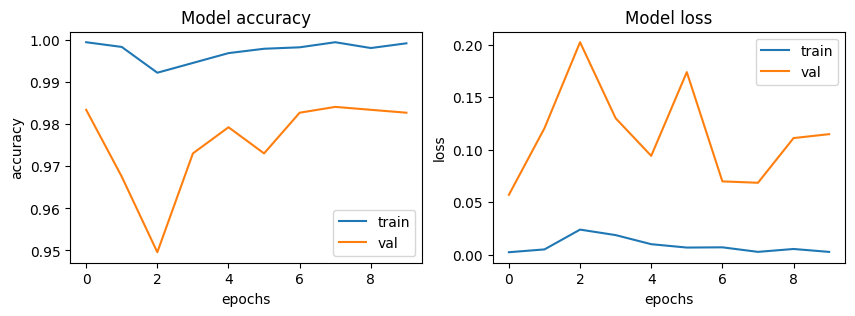

In [30]:
import plotly.express as px
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    

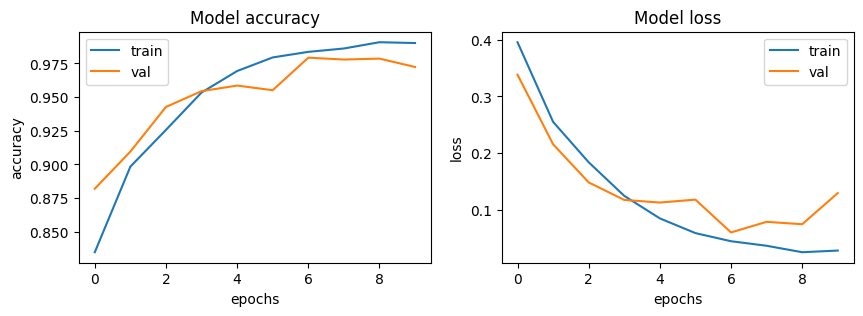

In [33]:
import plotly.express as px
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [42]:
history=model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.8863 - loss: 0.2829 - val_accuracy: 0.9102 - val_loss: 0.2609
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 337ms/step - accuracy: 0.9097 - loss: 0.2339 - val_accuracy: 0.9144 - val_loss: 0.2218
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 348ms/step - accuracy: 0.9231 - loss: 0.1931 - val_accuracy: 0.9227 - val_loss: 0.1867
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.9378 - loss: 0.1588 - val_accuracy: 0.9337 - val_loss: 0.1595
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 343ms/step - accuracy: 0.9585 - loss: 0.1158 - val_accuracy: 0.9413 - val_loss: 0.1453
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.9591 - loss: 0.1024 - val_accuracy: 0.9523 - val_loss: 0.1180
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.9684 - loss: 0.0842 - val_accuracy: 0.9613 - val_loss: 0.1153
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9788 - loss: 0.0588 - val_accu

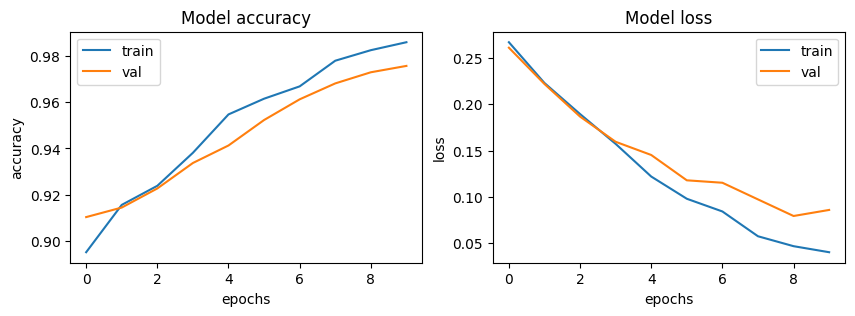

In [43]:
import plotly.express as px
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [45]:
scores=model.evaluate(test_generator)
print('test_accuracy = ', scores[1]*100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 613ms/step - accuracy: 0.9735 - loss: 0.1095
test_accuracy =  96.82758450508118


W0000 00:00:1713106212.838174     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [54]:
history=model.fit(train_generator,epochs=50,validation_data=val_generator)

Epoch 1/50
 1/91 ━━━━━━━━━━━━━━━━━━━━ 16:44 11s/step - accuracy: 0.5391 - loss: 0.6842

W0000 00:00:1713109930.630518     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 7/91 ━━━━━━━━━━━━━━━━━━━━ 2:00 1s/step - accuracy: 0.5358 - loss: 1.0584  

W0000 00:00:1713109939.348228     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.7414 - loss: 0.5943

W0000 00:00:1713109965.606085     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 49s 422ms/step - accuracy: 0.7421 - loss: 0.5928 - val_accuracy: 0.8543 - val_loss: 0.3467
Epoch 2/50


W0000 00:00:1713109968.800991     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 345ms/step - accuracy: 0.8589 - loss: 0.3292 - val_accuracy: 0.8757 - val_loss: 0.3142
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 337ms/step - accuracy: 0.8916 - loss: 0.2743 - val_accuracy: 0.9033 - val_loss: 0.2490
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 341ms/step - accuracy: 0.9134 - loss: 0.2094 - val_accuracy: 0.9289 - val_loss: 0.1857
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 337ms/step - accuracy: 0.9316 - loss: 0.1721 - val_accuracy: 0.9365 - val_loss: 0.1582
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 338ms/step - accuracy: 0.9442 - loss: 0.1360 - val_accuracy: 0.9503 - val_loss: 0.1260
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 348ms/step - accuracy: 0.9630 - loss: 0.0954 - val_accuracy: 0.9620 - val_loss: 0.1069
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9774 - loss: 0.0598 - val_accuracy: 0.9648 - val_loss: 0.0936
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 33s 338ms/step - accuracy: 0.9826 - loss: 0.0491 - val_accuracy: 0.969

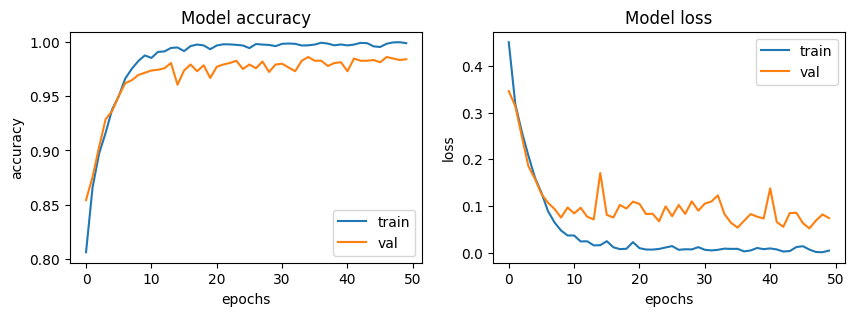

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [36]:
from keras.applications import VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in vgg16.layers:
    layer.trainable = False
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [58]:
scores=model.evaluate(test_generator)
print('test_accuracy = ', scores[1]*100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - accuracy: 0.9869 - loss: 0.0738
test_accuracy =  98.34482669830322


W0000 00:00:1713111675.302559     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [43]:
img_path = '/kaggle/input/covid19/curated_data/1NonCOVID/16_Morozov_study_0001_18.png'
img = image.load_img(img_path, color_mode='rgb', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
# Make the prediction
features = model.predict(x)
prediction = features[0][0]

# Print the prediction
print('Prediction:', prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: 0.96478623
